II - There are n! possibilities to change parameters in a layer of a neural network of n neurons. So for the total neural network it is much bigger (n!^l) with l = number of layers. On se pose la question de l'influence que le local minimum peut avoir et s'il est très dérangeant quand on backprop. <br>

Le minimum local est un problème car il nous empeche de trouver le minimum global de la fonction d'erreur.

III- Critical point = point ou le gradient est nul donc quon ne varie plus. Saddle points = points qui ne sont pas des extremums locaux mais qui sont des critical points. Pose pb pour optimiser les models. In big dimensions there are much more saddle points.
<br>
IV - 
Neural networks use Backprogation algorithm to find the parameters during the training. Backpropagation is based on the Gradient descent algorithm Convex optimization. Gradient descent is used to find the location of the Global minimum of a convex multivariable function.

The Hessian matrix can be used to prove a multivariable function is convex. If the Hessain matrix is a matrix of the second-order partial derivatives. If it is positive definite then the function is convex.

The second derivative permits to study the convexity of a function, if there is goign to be an inflexion point. Convexity : when the function is above his tangent .

#Ill condictionned matrix means that the loss function path is zigzaged to the minimum so has a lot of noise. Needs to be optimized by algo

#Identifiabilité :
Capacité d'un reseau de neurone a trouve le poids parfait. Injectivité de l'entrée qui est liée à un output.

#Exponentially weighted averages
Algorithm used to reduce noise in time series. It does it by correcting bias and weight thanks to the formula in the course.


#Momentum based optimization : 
Il y a une oscillation car a chaque itération de la descente de gradient ca va osciller jusqu'au minimum au milieu. Ca oscille lentement quand on arrive et ca empeche d'utiliser un learning rate trop haut. Si le learning rate ne diminuait pas les oscillations seraient trop aléatoires et violentes. Cet algo permet de ralentir les oscillations en mettant à jour les poids et le biais grace a des calculs de differentielles a chaque iteration ca permets de ralentir la vitesse de la balle quand elle arrive au minimum (analogie de la balle qui converge vers le minimum) le biais joue le role de la friction et permet de ralentir aussi. 
Le learning rate est controle pour reguler al vitesse de convergence et eviter de overshooter et dépasser le point de minimum.

Beta *v dW+(1-Beta)*dW
Ca nous permets de mettre a jour le poids et le biais qui va permettre de converger plus vite vers le minimum local

#Adagrad algo: Adaptive Gradient Algorithm
It is adapted to simple convex function.
Il regarde la valeur du gradient (dérivée).
Quand on s'approche du minimum local on diminue le learning rate pour faire des plus petits pas
Quand on est loin de la convergence plus on va vite donc on augmente le learning rate pour accelérer. 

#RMSProp (RootMeanSquare Prop) : 
Pertmets aussi de accelerer la descente de gradient. Se base sur le calcul de differentielles sur les mni batch. Ici les poids et biais sont mis a jour dans le but de ralentir la propogation de l'amplitude (en hauteur) des zigzags. La corrections permets daller plus directement vers le minimum grave aux calculs de derives qui reposent sur le carré des derivees pour leur mise a la racine dans un rapport
Reprends l'équation de Exponentially weighted averages : il s'appuie sur les gradietns precedents en ajoutant un decay à chaque itération




#Adam algo : 
On ocmbine les differentielles du momentum et RMS prop pour mettre a jour le poids et le biais. On mélance le v et la racine de s de square. 
ALPHA= learning rate et B : average rate de Exponentially weighted averages 


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [ ]:
wine=pd.read_csv('winequality-white.csv',sep=';')
print(wine.shape)

(4898, 12)


In [ ]:
wine=shuffle(wine).iloc[:1000]
wine.shape

(1000, 12)

Ex 2 : Data exploring and processing

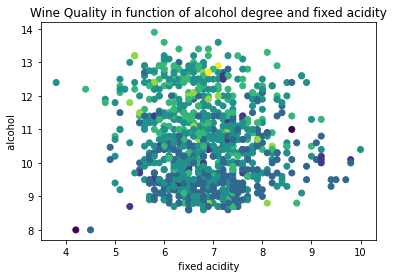

In [ ]:
import matplotlib . pyplot as plt
plt . scatter ( wine ['fixed acidity'],wine ['alcohol'],c= wine ['quality'],cmap ='viridis')
plt . xlabel (" fixed acidity ")
plt . ylabel (" alcohol ")
plt.title('Wine Quality in function of alcohol degree and fixed acidity')
plt . show ()

In [ ]:
X=wine[wine.columns[:-1]].values
y=to_categorical(wine['quality'].values)

In [ ]:
print(X.shape)
print(y.shape)

(1000, 11)
(1000, 10)


In [ ]:
n_train = 800
trainX , testX = X[: n_train , :] , X[ n_train :, :]
trainy , testy = y [: n_train ], y[ n_train :]


In [ ]:
print(trainX.shape,trainy.shape)
print(testX.shape,testy.shape)

(800, 11) (800, 10)
(200, 11) (200, 10)


Verify the categorical is right

In [ ]:
trainy[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
wine['quality'].values[:5]

array([6, 7, 6, 7, 5])

Create models

In [ ]:
def createModel():
  model = Sequential()
  model.add(Dense(50, input_shape=(11,), activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
def fit_model(trainX , trainy , testX , testy,learning_rate):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=SGD(lr=learning_rate),metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
    return history

In [ ]:
learning_rates=[1E-0 , 1E-1, 1E-2 , 1E-3 , 1E-4 , 1E-5 , 1E-6 , 1E-7]
history=[]
for i in range(len(learning_rates)):
    history.append(fit_model(trainX , trainy , testX , testy , learning_rates[i]))

# Loss function on the left , Accuracy fucntion on the right

In [ ]:
plt.figure(figsize=(20,30))
for i in range(1,len(history)+1):
    plt.subplot(8,2,2*(i))
    plt.plot(history[i-1].history['accuracy'], label ='train', color = 'r')
    plt.plot(history[i-1].history['val_accuracy'], label ='test', color = 'b')
    plt.title('lr={}'.format(learning_rates[i-1]))
    plt.legend()
    plt.subplot(8,2,(i)*2-1)
    plt.plot(history[i-1].history['loss'][10:], label ='train', color = 'r')
    plt.plot(history[i-1].history['val_loss'][10:], label ='test', color = 'b')
    plt.title('lr={}'.format(learning_rates[i-1]))
    plt.legend()
plt.show()

NameError: ignored

Momentum Dynamics we keep learning rate =0.1 on aurait pu prendre le lrate a 10^-5 car on voit que l'accuracy continue d'augmenter, si l'on augmente le nb epochs 
LE momentum rate correspond a l'hyperparametre Beta dans le calcul pour avancer dans l'algo. L'autre hyperparametre Alpha est le learning rate

In [ ]:
def fit_model_momentum(trainX , trainy , testX , testy,momentum):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=momentum),metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
    plt.plot(history.history['accuracy'], label ='train', color = 'r')
    plt.plot(history.history['val_accuracy'], label ='test', color = 'b')
    plt.title ('momentum={}'.format(momentum) , pad = -50)

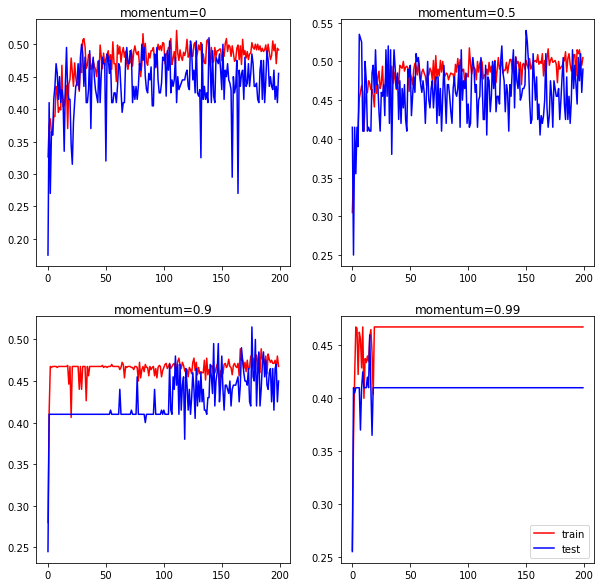

In [ ]:
plt.figure(figsize=(10,10))
momentums=[0 , 0.5, 0.9 , 0.99]
for i in range(len(momentums)):
    plot_no = 220 + (i +1)
    plt.subplot( plot_no )
    fit_model_momentum( trainX , trainy , testX , testy , momentums[i])
plt.legend()
plt.show()

Decay Learning rate

In [ ]:

# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))


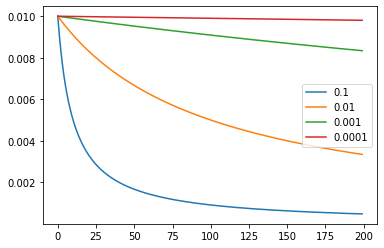

In [ ]:
decays = [1E-1 , 1E-2 , 1E-3 , 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays :
    # calculate learning rates for updates
    lrates = [ decay_lrate ( lrate , decay , i) for i in range ( n_updates )]
    # plot result
    plt.plot( lrates , label = str( decay ))
plt.legend()
plt.show()

In [ ]:
def fit_model_decay(trainX , trainy , testX , testy,decay):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, decay=decay),metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
    plt.plot(history.history['accuracy'], label ='train', color = 'r')
    plt.plot(history.history['val_accuracy'], label ='test', color = 'b')
    plt.title ('decay={}'.format(decay) , pad = -50)

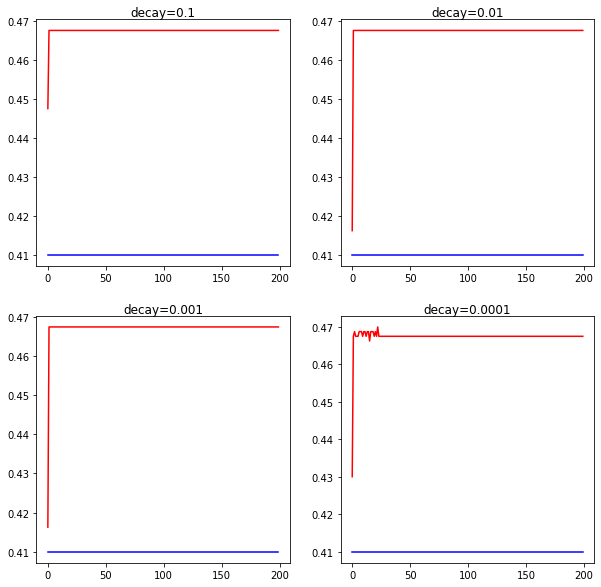

In [ ]:
plt.figure(figsize=(10,10))
decays = [1E-1 , 1E-2 , 1E-3 , 1E-4]
for i in range(len(decays)):
    plot_no = 220 + (i +1)
    plt.subplot( plot_no )
    fit_model_decay( trainX , trainy , testX , testy , decays[i])
plt.show()

# Effect of Adaptive Learning rates

In [ ]:
def fit_model_optimizer(trainX , trainy , testX , testy,optimizer,optname):
    model=createModel()
    model.compile(loss ='categorical_crossentropy', optimizer=optimizer, metrics =['accuracy'])
    history = model.fit( trainX , trainy , validation_data =( testX , testy ) ,epochs =200 , verbose =0)
    plt.plot(history.history['accuracy'], label ='train', color = 'r')
    plt.plot(history.history['val_accuracy'], label ='test', color = 'b')
    plt.title ('optimizer={}'.format(optname) , pad = -50)
    plt.legend()

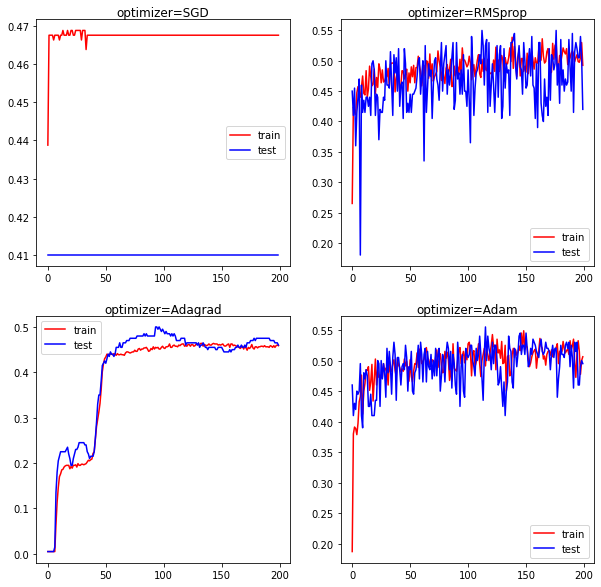

In [ ]:
plt.figure(figsize=(10,10))
optimizers = [SGD(learning_rate=0.1),RMSprop(), Adagrad(), Adam()]
optnames=['SGD','RMSprop','Adagrad','Adam']
for i in range(len(optimizers)):
    plot_no = 220 + (i +1)
    plt.subplot( plot_no )
    fit_model_optimizer( trainX , trainy , testX , testy , optimizers[i],optnames[i])
plt.show()